In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
plt.style.use('ggplot')

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

def format_graph():
    ax.set_ylim(0, 3)
    ax.set_yticks([1, 2, 3, 4])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
    #ax.set_xticks([])
    ax.set_xlabel("seconds")
    ax.set_ylabel("ops/second")
    
def graph_it(ax, s, run):
    site = s + "-run" + str(run)
    clients0 = glob.glob(site+"-foreground-issdm-*-throughput.csv")
    clients1 = [site+"-issdm-14-throughput.csv",
                    site+"-issdm-11-throughput.csv",
                    site+"-issdm-0-throughput.csv",
                    site+"-issdm-1-throughput.csv"]
    clients2 = [site+"-issdm-24-throughput.csv",
                    site+"-issdm-27-throughput.csv",
                    site+"-issdm-40-throughput.csv",
                    site+"-issdm-20-throughput.csv"]
    
    s = sum_throughput(clients0)
    ax.plot(range(0, len(s['rate'])*6, 6), s['rate']/1000, 
            'r-', marker='x', linewidth=2.0, label="Sequencer 1")

    t = sum_throughput(clients1)
    ax.plot(range(0, len(t['rate'])*6, 6), t['rate']/1000, 
            'b-', marker='o', linewidth=2.0, label="Sequencer 2")
    
    u = sum_throughput(clients2)
    ax.plot(range(0, len(t['rate'])*6, 6), u['rate']/1000, 
            'g-', marker='o', linewidth=2.0, label="Sequencer 2")
    
    ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate']+u['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")
    format_graph()
    
def graph_total(ax, s, run=-1, color="black", marker='o', label="None"):
    site = s
    if run != -1: site = site + "-run" + str(run)
    clients0 = glob.glob(site+"-foreground-issdm-*-throughput.csv")
    clients1 = [site+"-issdm-14-throughput.csv",
                    site+"-issdm-11-throughput.csv",
                    site+"-issdm-0-throughput.csv",
                    site+"-issdm-1-throughput.csv"]
    clients2 = [site+"-issdm-24-throughput.csv",
                    site+"-issdm-27-throughput.csv",
                    site+"-issdm-40-throughput.csv",
                    site+"-issdm-20-throughput.csv"]
    s = sum_throughput(clients0)
    t = sum_throughput(clients1)
    u = sum_throughput(clients2)

    ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate']+u['rate'])/1000, 
        '-', color=color, marker=marker, linewidth=2.0, label=label)
    format_graph()
    return s + t + u

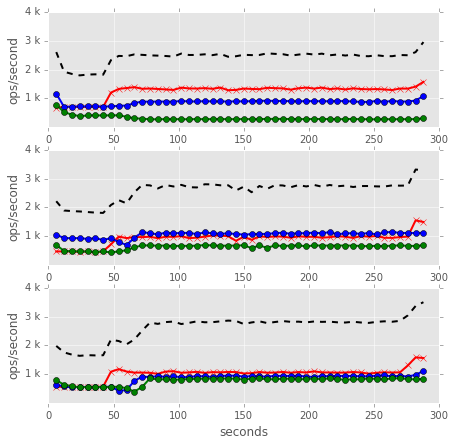

In [3]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(311)
graph_it(ax, "mantle-runs", 0)

ax = fig.add_subplot(312)
graph_it(ax, "mantle-runs", 1)

ax = fig.add_subplot(313)
graph_it(ax, "mantle-runs", 2)

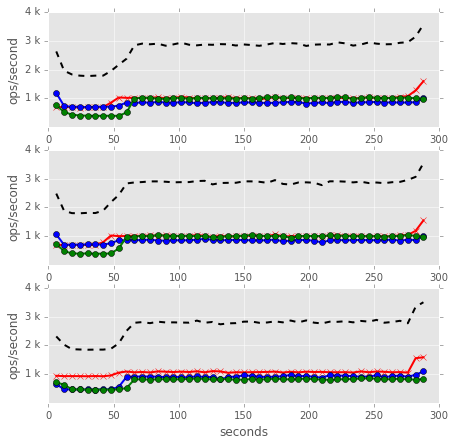

In [4]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(311)
graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 0)

ax = fig.add_subplot(312)
graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 1)

ax = fig.add_subplot(313)
graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 2)



In [5]:
#fig = plt.figure(figsize=(7, 7))

#ax = fig.add_subplot(311)
#graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 0)

#ax = fig.add_subplot(312)
#graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 1)

#ax = fig.add_subplot(313)
#graph_it(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy", 2)

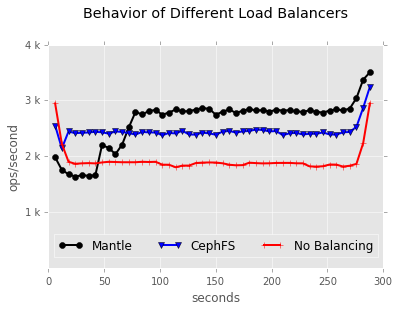

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
mantle = graph_total(ax, "mantle-runs", label="Mantle", run=2)
cephfs = graph_total(ax, "../results-cephfs/cephfs-mode1",label="CephFS", run=0, color='blue', marker='v')
baseline = graph_total(ax, "../results-mantle/baseline", label="No Balancing", color='red', marker='+')
ax.set_ylim(0, 4)
ax.set_title("Behavior of Different Load Balancers", y=1.1)
lgd = ax.legend(loc='center', ncol=3, bbox_to_anchor=(0.5,0.1))
plt.savefig('mantle-balancer-behaviors.png', dpi=300, bbox_inches='tight')

In [7]:
cephfs_mode0 = [graph_total(ax, "../results-cephfs/cephfs-mode0",label="CephFS", run=0, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode0",label="CephFS", run=1, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode0",label="CephFS", run=2, color='blue', marker='v').mean()]
cephfs_mode1 = [graph_total(ax, "../results-cephfs/cephfs-mode1",label="CephFS", run=0, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode1",label="CephFS", run=1, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode1",label="CephFS", run=2, color='blue', marker='v').mean()]
cephfs_mode2 = [graph_total(ax, "../results-cephfs/cephfs-mode2",label="CephFS", run=0, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode2",label="CephFS", run=1, color='blue', marker='v').mean(),
                graph_total(ax, "../results-cephfs/cephfs-mode2",label="CephFS", run=2, color='blue', marker='v').mean()]
cephfs_mode2

[rate    2485.333333
 dtype: float64, rate    2479.791667
 dtype: float64, rate    2701.875
 dtype: float64]

In [8]:
mantle = [graph_total(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy",label="CephFS", run=0, color='blue', marker='v').mean(),
          graph_total(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy",label="CephFS", run=1, color='blue', marker='v').mean(),
          graph_total(ax, "../results-mantle-runs-getoffproxy/mantle-runs-getoffproxy",label="CephFS", run=2, color='blue', marker='v').mean()]
mantle

[rate    2722.645833
 dtype: float64, rate    2734
 dtype: float64, rate    2667.833333
 dtype: float64]

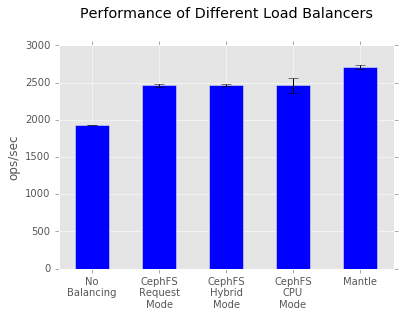

In [9]:
fig, ax = plt.subplots()

ax.bar([0.5, 2.5, 4.5, 6.5, 8.5], 
       [baseline['rate'].mean(), np.mean(cephfs_mode1), np.mean(cephfs_mode1), np.mean(cephfs_mode1), np.mean(mantle)], 
       1, color='blue', ecolor='black', capsize=5,
       yerr=[0, np.std(cephfs_mode0), np.std(cephfs_mode1), np.std(cephfs_mode2), np.std(mantle)])

plt.xticks([1, 3, 5, 7, 9], ['No\nBalancing', 'CephFS\nRequest\nMode', 'CephFS\nHybrid\nMode', 'CephFS\nCPU\nMode', 'Mantle'])
ax.set_xlim(0, 10)
ax.set_ylim(0, 3000)
ax.set_ylabel("ops/sec")
ax.set_title("Performance of Different Load Balancers", y=1.1)
plt.savefig('mantle-balancer-performance.png', dpi=300, bbox_inches='tight')